In [2]:
import numpy as np

Праивла транслирования (см LK2)
1. сравниваются размерности двух масисвов, если они отливаются, то форма массива с меньшей дополняется слева единицами
2. если форма двух массивов не совпадает в какойм-то измерении, то массив с формой 1 в данном измерений расятивается до соответсвия форме другого массива
3. если после этого в какой-то измерении есть разница и там нет ни одной единицы, то ошибка

In [6]:
a = np.ones((2, 3))
b = np.arange(3)
c = np.ones((1, 3))
print(a)
print(b)
print(c)

[[1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]
[[1. 1. 1.]]


In [10]:
print(a.shape)
print(b.shape)
print(c.shape) # c != b

(2, 3)
(3,)
(2, 3)


In [11]:
c = a + b
print(c)
print(c.shape)

[[1. 2. 3.]
 [1. 2. 3.]]
(2, 3)


In [12]:
a = np.arange(3).reshape(3, 1)
b = np.arange(3)
print(a)
print(b)
print(a.shape)
print(b.shape)

[[0]
 [1]
 [2]]
[0 1 2]
(3, 1)
(3,)


после первого шага у b (1, 3) у a (3, 1) и после второго шага, у b дублируются строки, у а - столбцы, и их размерности  (3, 3)

In [15]:
print(a + b)
print(a * b)

[[0 1 2]
 [1 2 3]
 [2 3 4]]
[[0 0 0]
 [0 1 2]
 [0 2 4]]


In [16]:
a = np.ones((3, 2))
b = np.arange(3)
print(a)
print(b)
print(a.shape)
print(b.shape)

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0 1 2]
(3, 2)
(3,)


после первого шага: a - (3, 2), b - (1, 3) -> (3, 3) и ошибка по пункту 3

In [17]:
print(a + b)

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

варианты применения
1. центрирование массивов

In [20]:
a = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9], [9, 8, 7, 6, 5, 4, 3, 2, 1]])
print(a)

[[1 2 3 4 5 6 7 8 9]
 [9 8 7 6 5 4 3 2 1]]


In [31]:
aMean = a.mean()
print(aMean)

5.0


In [32]:
aMean = a.mean(0)
print(aMean)

[5. 5. 5. 5. 5. 5. 5. 5. 5.]


In [33]:
print(a.shape)
print(aMean.shape)

(2, 9)
(9,)


In [35]:
aCentr = a - aMean
print(aCentr)

[[-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [ 4.  3.  2.  1.  0. -1. -2. -3. -4.]]


In [36]:
print(aCentr.mean(0))

[0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [63]:
aMean = a.mean(1)
print(aMean)
print(a.shape)
print(aMean.shape)
aCentr = a - aMean


[5. 5.]
(2, 9)
(2,)


ValueError: operands could not be broadcast together with shapes (2,9) (2,) 

In [64]:
aMean = aMean[:, np.newaxis]
print(aMean)
print(a.shape)
print(aMean.shape)
aCentr = a - aMean

[[5.]
 [5.]]
(2, 9)
(2, 1)


In [65]:
import matplotlib.pyplot as plt

In [66]:
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
print(x)

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

z = np.sin(x)*y #размерности массивов совпадают, поэтому трнанслирования не проиходит, если мы хотим матрицу 100х100, то нужно изменить размерности изначальных массивов

In [67]:
y = y[:, np.newaxis]

In [68]:
z = np.sin(x)*y + np.cos(10 + y * x) ** 3
print(z.shape)

(100, 100)


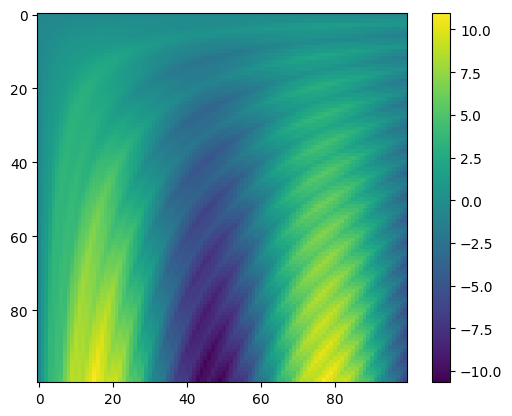

In [69]:
plt.imshow(z)
plt.colorbar()
plt.show()

Маскирование

In [72]:
x = np.arange(1, 6)
a = x < 3
print(a)
print(np.less(x, 3))

[ True  True False False False]
[ True  True False False False]


In [81]:
rnd1 = np.random.default_rng(seed = 1)
rnd2 = np.random.default_rng(seed = 10)
x = rnd1.integers(10, size = (3, 4))
print(x, x < 6)

[[4 5 7 9]
 [0 1 8 9]
 [2 3 8 4]] [[ True  True False False]
 [ True  True False False]
 [ True  True False  True]]


сколько эдементов меньше n

In [92]:
print(x)
print(np.count_nonzero(x < 6))
print(np.sum(x < 6))
print(np.sum(x < 6, axis = 1))
print(np.any(x < 8))
print(np.any(x == -1))
print(np.sum((x > 3) & (x < 9) , axis = 0))
print(np.sum(np.bitwise_and(np.greater(x, 3), np.less(x, 9)) , axis = 0))

[[4 5 7 9]
 [0 1 8 9]
 [2 3 8 4]]
7
7
[2 2 3]
True
False
[1 1 3 1]
[1 1 3 1]


наложение маски

In [97]:
print(x)
a = x < 5
print(a)
print(x[a], a.shape)

[[4 5 7 9]
 [0 1 8 9]
 [2 3 8 4]]
[[ True False False False]
 [ True  True False False]
 [ True  True False  True]]
[4 0 1 2 3 4] (3, 4)


In [108]:
print(bool(42), bool(0))
print(bool(42 and 8))
print(bool(42 & 128))

True False
True
False


способы доступа к элементами массива

In [109]:
a = np.arange(10)
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [111]:
print(a[3])
print(a[3:4])
print(a[a == 3])

3
[3]
[3]


векторизирования / прихотливая (fancy) индексация

In [118]:
a = np.arange(1, 10)
print(a)
ind = [3, 5, 8]
print(a[ind])
ind = [[3, 5], [0, 3]]
print(a[ind])

[1 2 3 4 5 6 7 8 9]
[4 6 9]
[[4 6]
 [1 4]]


In [123]:
a = np.arange(12).reshape((3, 4))
print(a)
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
print(a[row, col])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 2  5 11]


In [124]:
print(row.shape)
print(col.shape)

(3,)
(3,)


In [126]:
print(a[row[:, np.newaxis], col])

[[ 2  1  3]
 [ 6  5  7]
 [10  9 11]]
